In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import string
import emoji 
import demoji

# Start with loading all necessary libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
sarc = pd.read_csv("train.En.csv")

In [4]:
sarc.head()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffeine addiction,1,"College is really difficult, expensive, tiring, and I often question if a degree is worth the stress.",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯,1,I do not like when professors don’t write out specific notes on my answers to exams.,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said black lives matter... we love capitalism 🥰🙌🏼,1,"I, at the bare minimum, wish companies actually cared about marginalized communities. At the max, that our capitalistic society is dismantled.",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee,1,"Today my pop-pop told me I was not ""forced"" to go to college. That's not true.",1.0,0.0,0.0,0.0,0.0,0.0
4,4,"@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.",1,I would say Ted Cruz is an asshole and doesn’t actually care about people/babies/fetuses. He just wants to wage a war on women and keep the patriarchy in power.,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
sarc_data = sarc.drop(["Unnamed: 0", "rephrase", "sarcasm", "irony", "satire", "understatement", "overstatement", "rhetorical_question"] , axis=1)

In [6]:
df = sarc_data

#lowercase
df.tweet = df.tweet.str.lower()
# @ user
df.tweet = df.tweet.apply(lambda x: re.sub(r'@[\w]+', '@user', str(x)))
# remove url part 1
df.tweet = df.tweet.apply(lambda x: re.sub(r'https?:\/\/\S+', 'URL', str(x)))
# remove url/website that didn't use http, is only checking for .com websites 
# so words that are seperated by a . are not removed
df.tweet = df.tweet.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", 'URL', str(x)))
# remove {link}
df.tweet = df.tweet.apply(lambda x: re.sub(r'{link}', 'URL', x))
# remove hastags
df.tweet = df.tweet.apply(lambda x: re.sub(r'#[\w]+', '', x))

In [7]:
def replace_with_words(text):
    return emoji.demojize(text)

df['tweet'] = df['tweet'].apply(replace_with_words)

In [8]:
tknzr = TweetTokenizer()
df['tweet']= df['tweet'].apply(tknzr.tokenize)

In [9]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [10]:
def remove_stopwords(word_list):
    """remove stopwords from a list of tokens"""
    return [w for w in word_list if w not in STOPWORDS]

In [11]:
df['tweet'] = df['tweet'].apply(remove_stopwords)

In [12]:
df.head()

,tweet,sarcastic
0,"[thing, got, college, caffeine, addiction]",1
1,"[love, professors, draw, big, question, mark, next, answer, exam, ’, always, like, yeah, ’, either, ¯, \, _, (, ツ, ), _, /, ¯]",1
2,"[remember, hundred, emails, companies, covid, started, getting, real, ?, ’, gotten, three, regards, support, protests, ., @user, shared, helpful, links, actually, said, black, lives, matter, ..., love, capitalism, :, smiling_face_with_hearts, ::, raising_hands_medium-light_skin_tone, :]",1
3,"[today, pop-pop, told, “, forced, ”, go, college, :, upside-down_face, :, okay, sure, sureeee]",1
4,"[@user, @user, @user, ,, also, reported, cancun, cruz, worrying, heartbeats, constituents, without, electricity, heat, fled, mexico, .]",1


In [13]:
# Isolating sarcastic and non-sarcastic
sarcastic_tweets = df[df['sarcastic'] == 1]['tweet']
non_sarcastic_tweets = df[df['sarcastic'] == 0]['tweet']


In [14]:
sarcastic_tweets.head()

0                                                                                                                                                                                                                                                         [thing, got, college, caffeine, addiction]
1                                                                                                                                                                     [love, professors, draw, big, question, mark, next, answer, exam, ’, always, like, yeah, ’, either, ¯, \, _, (, ツ, ), _, /, ¯]
2    [remember, hundred, emails, companies, covid, started, getting, real, ?, ’, gotten, three, regards, support, protests, ., @user, shared, helpful, links, actually, said, black, lives, matter, ..., love, capitalism, :, smiling_face_with_hearts, ::, raising_hands_medium-light_skin_tone, :]
3                                                                                                                        

In [15]:
non_sarcastic_tweets.head()

867                            [always, think, going, braless, good, idea, i'm, public, insecure, i'm, wearing, bra]
868                                                                           [life, much, better, heating, blanket]
869                                                                      [sometimes, go, phone, look, pictures, dog]
870    [back, states, even, 5, minutes, someone, ran, airport, suitcase, said, “, ope, ,, sorry, !, ”, ’, home, :-)]
871                                                           [desperate, need, (, stress, enough, ), spring, break]
Name: tweet, dtype: object

In [16]:
sarc_text = []

for tweet in sarcastic_tweets:
    # single string
    tweet_str = ' '.join(tweet)
    sarc_text.append(tweet_str)


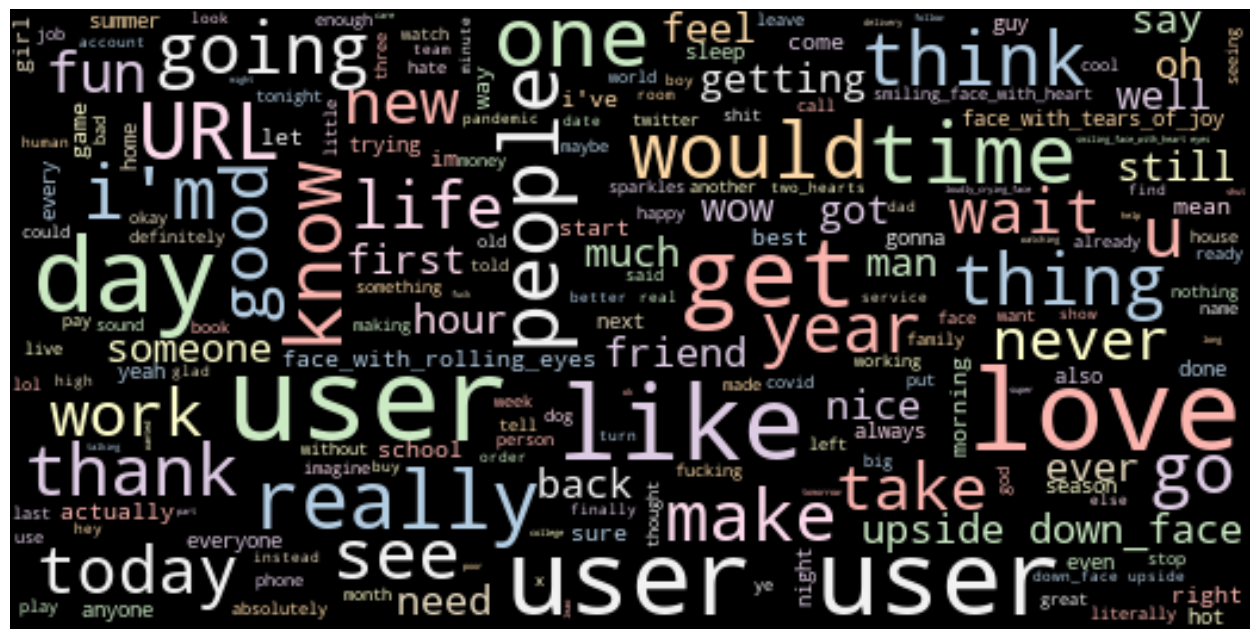

In [17]:
# Combine all sarcastic tweets into a single string
sarc_text_combined = ' '.join(sarc_text)

# Generate word cloud
sarc_cloud = WordCloud(width=520, height=260, stopwords=STOPWORDS, max_font_size=50, background_color="black", colormap='Pastel1').generate(sarc_text_combined)

# Display word cloud
plt.figure(figsize=(16, 10))
plt.imshow(sarc_cloud, interpolation='bilinear')
plt.axis('off')  # turn off axis
plt.show()


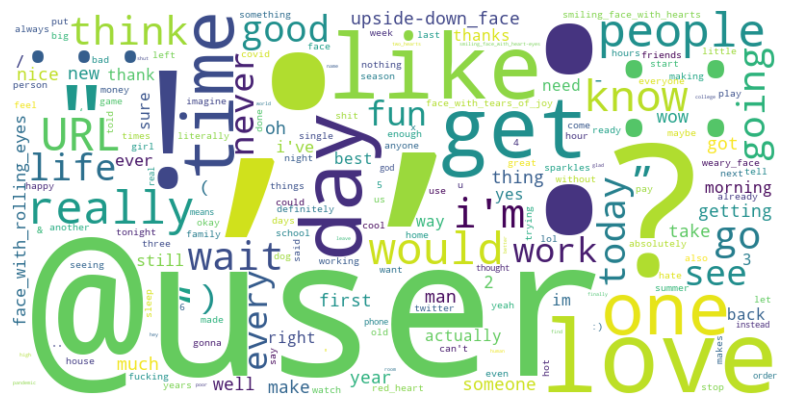

Top 20 most common words:
:: 464
.: 422
’: 288
,: 271
@user: 232
?: 202
!: 162
::: 106
love: 84
": 75
like: 69
get: 59
day: 59
...: 50
one: 44
time: 43
people: 42
really: 41
URL: 40
would: 38
[':', '.', '’', ',', '@user', '?', '!', '::', 'love', '"', 'like', 'get', 'day', '...', 'one', 'time', 'people', 'really', 'URL', 'would']


In [18]:
# Sample text
text = sarc_text_combined
word_freq = Counter(text.split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# top 20 because most are punctuation based
print("Top 20 most common words:")
for word, freq in word_freq.most_common(20): 
    print(f"{word}: {freq}")

    
        
# List for comparison
sarc_frequent_word_list = [word for word, freq in word_freq.most_common(20)]
print(sarc_frequent_word_list)

In [19]:
non_sarc_text = []

for tweet in non_sarcastic_tweets:
    #join-one string
    tweet_str = ' '.join(tweet)
    non_sarc_text.append(tweet_str)


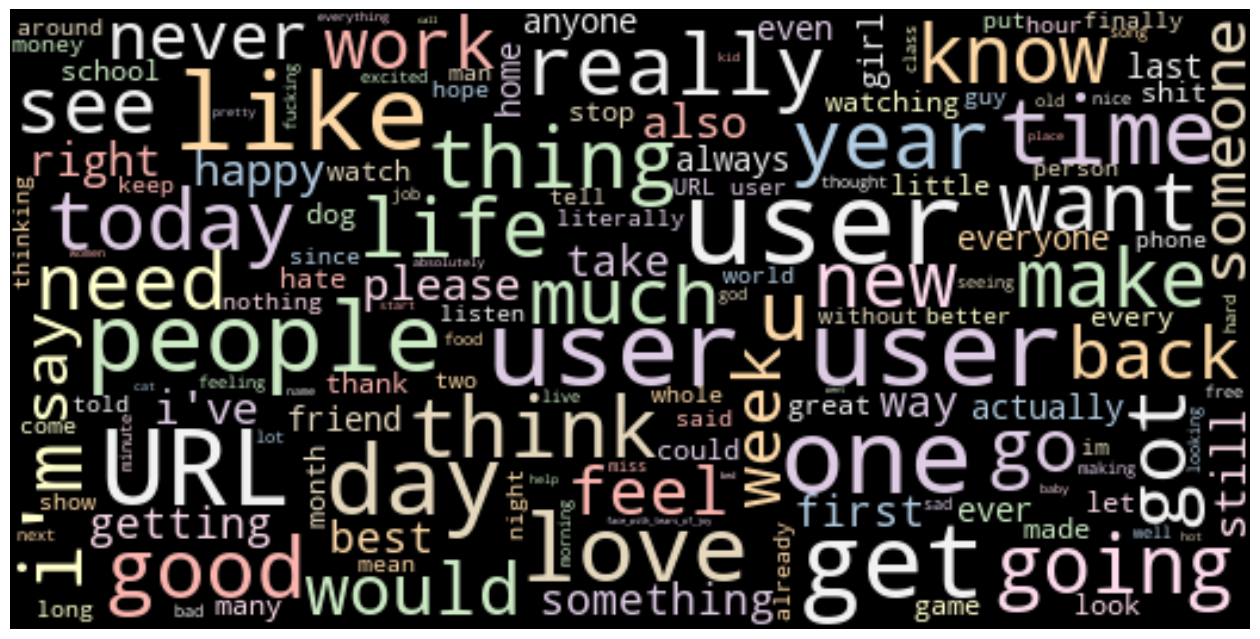

In [20]:
# single string
non_sarc_text_combined = ' '.join(non_sarc_text)

non_sarc_cloud = WordCloud(width=520, height=260, stopwords=STOPWORDS, max_font_size=50, background_color="black", colormap='Pastel1').generate(non_sarc_text_combined)

plt.figure(figsize=(16, 10))
plt.imshow(non_sarc_cloud, interpolation='bilinear')
plt.axis('off')  # turn off axis
plt.show()


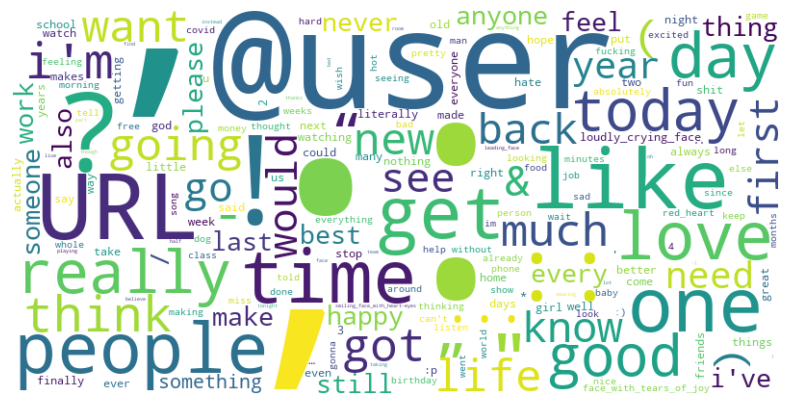

Top 20 most common words:
.: 1454
:: 1101
,: 980
’: 861
@user: 606
!: 497
?: 370
URL: 249
::: 227
like: 201
one: 163
time: 156
get: 152
people: 145
": 142
love: 132
day: 113
really: 107
”: 105
good: 103


In [21]:
text = non_sarc_text_combined
word_freq = Counter(text.split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Get top 20 as most are punctuation based
print("Top 20 most common words:")
for word, freq in word_freq.most_common(20):  
    print(f"{word}: {freq}")
    
    
# save as list for comparison
non_sarc_frequent_word_list = [word for word, freq in word_freq.most_common(20)]


In [22]:
sarc_frequent_word_list


[':',
 '.',
 '’',
 ',',
 '@user',
 '?',
 '!',
 '::',
 'love',
 '"',
 'like',
 'get',
 'day',
 '...',
 'one',
 'time',
 'people',
 'really',
 'URL',
 'would']

In [23]:
non_sarc_frequent_word_list

['.',
 ':',
 ',',
 '’',
 '@user',
 '!',
 '?',
 'URL',
 '::',
 'like',
 'one',
 'time',
 'get',
 'people',
 '"',
 'love',
 'day',
 'really',
 '”',
 'good']